In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# # Commands to download the two datastes into your Google Drive (e.g. for the example MyDatasetFolder)
# # Google CoLab will ask the permissions to access Google Drive: accept
# !wget -P /content/drive/MyDrive/MyDatasetFolder/lighter_books.json https://adm2023.s3.amazonaws.com/lighter_books.json
# !wget -P /content/drive/MyDrive/MyDatasetFolder/lighter_authors.json https://adm2023.s3.amazonaws.com/lighter_authors.json

# minimal packages to import
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt

# setting the filepath for the dataset, depending on where you saved them
filepath_books = "/content/drive/MyDrive/MyDatasetFolder/lighter_books.json"
filepath_authors = "/content/drive/MyDrive/MyDatasetFolder/lighter_authors.json"




In [3]:
# code for importing the authors dataset
df_authors = pd.read_json(filepath_authors, lines = True)

# remember that th enumber of books is almost 7 millions
chunks = pd.read_json(filepath_books, lines = True, chunksize = 10000)

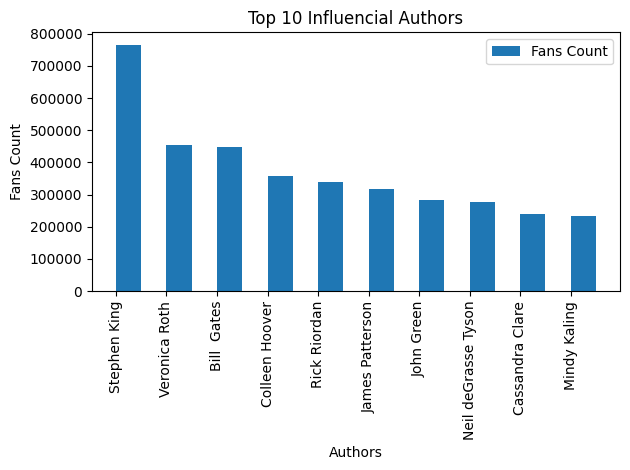

In [8]:
# RQ5.1: Plot the top 10 most influential authors regarding their fan count and number of books. Who is the most influential author?

# Sort the DataFrame by 'fans_count' and then by the length of 'work_ids' list in descending order
sorted_df = df_authors.sort_values(by=['fans_count', 'works_count'], ascending=[False, False])
top_authors = sorted_df.head(10)


# Plot 10 most influencial
bar_width = 0.5
p1 = plt.bar([x + bar_width for x in range(10)], top_authors['fans_count'], bar_width, label='Fans Count')
plt.xlabel('Authors')
plt.xticks([x + bar_width / 2 for x in range(10)], top_authors['name'], rotation='vertical')
plt.ylabel('Fans Count')
plt.title('Top 10 Influencial Authors')
plt.legend()
plt.tight_layout()
plt.show()


# The most influencial authors according to this method is Stephen King

In [9]:
# RUN ONCE
# I iterate to create top_authors_books which I will use to analyse the books of the top 10 most influencial authors

top_authors_list = list(top_authors['id']) # Make a list with the authors_id
filtered_chunks = []

# Iterate through chunks and filter by the 10 author_ids
for chk in chunks:
    filtered_chunk = chk[chk['author_id'].isin(top_authors_list)]
    filtered_chunks.append(filtered_chunk)

top_authors_books = pd.concat(filtered_chunks, ignore_index=True) # concatenate filtered chunks


In [11]:
# RQ5.2: Have they published any series of books? If any, extract the longest series name among these authors.

authors_with_series = top_authors_books[top_authors_books['series_name'].notna() & (top_authors_books['series_name'] != '')] # I exclude all the books which are not part of a series

# For each author I iterate and create a authors_with_series_filtered variable with only their books
for name in authors_with_series['author_name'].unique():
    max_n = 0
    max_series = ''
    authors_with_series_filtered = authors_with_series[authors_with_series['author_name'] == name]

    # Now for each serie I take the maximum series_position
    for serie in authors_with_series_filtered['series_name'].unique():
        series_filtered = authors_with_series_filtered[authors_with_series_filtered['series_name'] == serie]
        max_n_serie = 0
        for n in series_filtered['series_position'].unique():
            try:
                n = int(n)
                if n > max_n_serie:
                    max_n_serie = n
            except ValueError: # Some values are not accepted because they contain other char
                pass
        if max_n_serie > max_n: # If serie with maximum value set name and number of part of that serie
            max_n = max_n_serie
            max_series = serie

    print("- " + str(name) + "'s longest series is: " + max_series + " with " + str(max_n) + " Parts")

# Bill Gates and Mindy Kailing do not have any series of book. Below you can find the longest series:

- Stephen King's longest series is: Batman (1940-2011) with 400 Parts
- James Patterson's longest series is: Alex Cross with 23 Parts
- Neil deGrasse Tyson's longest series is: Merlin with 2 Parts
- Rick Riordan's longest series is: The 39 Clues with 11 Parts
- Cassandra Clare's longest series is: The Bane Chronicles with 11 Parts
- John Green's longest series is: Zombicorns with 2 Parts
- Veronica Roth's longest series is: Divergent with 3 Parts
- Colleen Hoover's longest series is: Slammed with 3 Parts


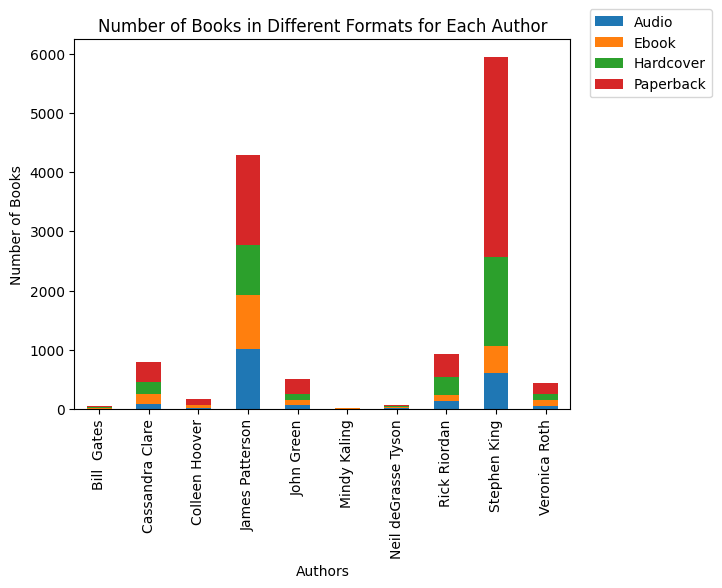

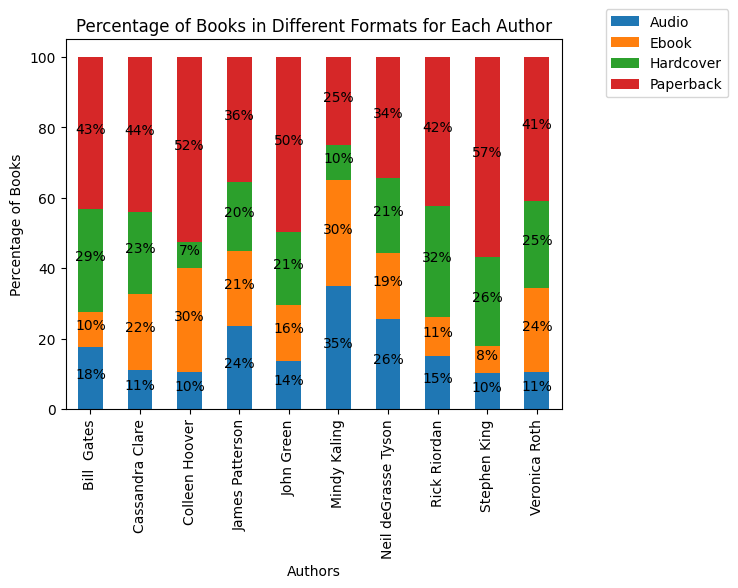

In [12]:
# RQ5.3: How many of these authors have been published in different formats? Provide a meaningful chart on the distribution of the formats and comment on it.

# Too many formats, I created a mapping to create a column named standar_formats
format_mapping = {
    'Paperback': 'Paperback',
    'Hardcover': 'Hardcover',
    'Mass Market Paperback': 'Paperback',
    'Audio CD': 'Audio',
    'Library Binding': 'Hardcover',
    'Rústica bolsillo': 'Paperback',
    'Unknown Binding': 'Hardcover',
    'Audio Cassette': 'Audio',
    'ebook': 'Ebook',
    'Audio': 'Audio',
    'Hardcover, Book and Bookend Gift Set': 'Hardcover',
    'Hardcover, Sewn Binding, Paper Dust Jacket': 'Hardcover',
    'Audiobook': 'Audio',
    'MP3 CD': 'Audio',
    'Leather Bound': 'Hardcover',
    'Boxed Set': 'Hardcover',
    'MP3 Book': 'Audio',
    'School &amp; Library Binding': 'Hardcover',
    'Playaway Audiobook': 'Audio',
    'Product Bundle': 'Paperback',
    'Pamphlet': 'Paperback',
    'CD-ROM': 'Audio',
    'Turtleback': 'Hardcover',
    'paper': 'Paperback',
    'Flexcover': 'Paperback',
    'Hardcover + CD': 'Hardcover',
    'Soft Cover': 'Paperback',
    'Large paperback boxed set': 'Paperback',
    'Paperback / شومیز - رقعی': 'Paperback',
    'Large Print': 'Paperback',
    'Kindle Edition': 'Ebook',
    'Spiral-bound': 'Paperback',
    'Loose Leaf': 'Paperback',
    'Microsoft Reader Edition': 'Paperback',
    'Broché': 'Paperback',
    'Paperback &amp; Audio CD': 'Paperback',
    'Hardback': 'Hardcover',
    'Board Book': 'Hardcover',
    'Твердый переплет (Hardcover)': 'Hardcover',
    'Preloaded Digital Audio Player': 'Audio',
    'Postcard book': 'Paperback',
    'Unabridged Audiobook Download': 'Audio',
    'MP3': 'Audio',
    'Brochura (Paperback)': 'Paperback',
    'Hard Cover (gebonden)': 'Hardcover',
    'Trade Paperback': 'Paperback',
    'Kindle': 'Ebook',
    'Paperback and CD': 'Paperback',
    'Capa Mole': 'Paperback',
    'Fine Binding': 'Hardcover',
    'Paperback with flaps': 'Paperback',
    'audiobook': 'Audio',
    'Preloaded Digital Audio Player with earbuds': 'Audio',
    'Audible Audio': 'Audio',
    'Copertina rigida': 'Hardcover',
    'MP3 on CD': 'Audio',
    'DVD': 'Audio',
    '創元推理文庫': 'Paperback',
    'Board book': 'Hardcover',
    'audio': 'Audio',
    'hardback': 'Hardcover',
    'Paperback, Paper Dust Jacket': 'Paperback',
    'Videocassette': 'Audio',
    'Kindle Edition with Audio/Video': 'Ebook',
    'Slipcased Hardcover': 'Hardcover',
    'Audio Playaway': 'Audio',
    'Audible.com': 'Audio',
    'Leatherette': 'Hardcover',
    'Flexband': 'Paperback'
}

df = top_authors_books
df['standard_format'] = df['format'].map(format_mapping)
top_authors_books = df[df['standard_format'].notna() & (df['standard_format'] != '')] # Clear from NA values and ''

# Count the number of books in each format for each author
format_counts = top_authors_books.groupby(['author_name', 'standard_format']).size().unstack(fill_value=0)

# This graph is good but it's not reaally clear the distribution of the books, I decided to make in terms of percentage in the second graph
format_counts.plot(kind='bar', stacked=True, ax=plt.gca())
plt.xlabel('Authors')
plt.ylabel('Number of Books')
plt.title('Number of Books in Different Formats for Each Author')
plt.legend(bbox_to_anchor=(1.3, 1.10))
plt.show()

# Normalize the format_counts to represent percentages
row_sums = format_counts.sum(axis=1)
normalized_format_counts = format_counts.div(row_sums, axis=0) * 100

# Plot second graph
ax = normalized_format_counts.plot(kind='bar', stacked=True, ax=plt.gca())
plt.xlabel('Authors')
plt.ylabel('Percentage of Books')
plt.title('Percentage of Books in Different Formats for Each Author')
plt.legend(bbox_to_anchor=(1.35, 1.10))

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    percentage = height
    if percentage > 0:
        ax.annotate(f'{percentage:.0f}%', (x + width/2, y + height/2), ha='center')

plt.show()

# the preferred format is paperback cover. If we consider Ebook and Audio to be the more sustainable option we can say that of the 10 best authors only Mindy Kailing was the one which delivered her content in a more sustainable fortmat.


In [21]:
# RQ5.4 Provide information about the general response from readers (number of fans, average rating, number of reviews, etc.), divide the authors by gender, and comment about anything eventually related to “structural bias.”

# Divide male authors from female authors.
male_authors = top_authors[top_authors['gender'] == 'male']
female_authors = top_authors[top_authors['gender'] == 'female']
male_authors_list = list(male_authors['id'])
male_authors_list.extend([1406384, 12855, 23470]) # Some genders are not specified in lighter_authors.json. Through a quick research none identified in other genders. We therefore added them to their biological sex.
female_authors_list = list(female_authors['id'])
female_authors_list.append(194416)

# create variable male_books and female_books including all the books for each gender (Only two were present in top 10 authors so I divided in two categories)
male_books = top_authors_books[top_authors_books['author_id'].isin(male_authors_list)]
female_books = top_authors_books[top_authors_books['author_id'].isin(female_authors_list)]


# Process data
male_fanscount = male_authors['fans_count'].mean()
print("- Average male fans count is: " + str(round(male_fanscount, 1)))
female_fanscount = female_authors['fans_count'].mean()
print("- Average female fans count is: " + str(round(female_fanscount, 1)))

male_avg_rating = male_authors['average_rating'].mean()
print("- Average male rating is: " + str(round(male_avg_rating, 1)))
female_avg_rating = female_authors['average_rating'].mean()
print("- Average female rating is: " + str(round(female_avg_rating, 1)))

male_ratingcount = male_authors['ratings_count'].mean()
print("- Average male rating count is: " + str(round(male_ratingcount, 1)))
female_ratingcount = female_authors['ratings_count'].mean()
print("- Average female rating count is: " + str(round(female_ratingcount, 1)))

male_reviewscount = male_authors['text_reviews_count'].mean()
print("- Average male text reviews count is: " + str(round(male_reviewscount, 1)))
female_reviewscount = female_authors['text_reviews_count'].mean()
print("- Average female text reviews count is: " + str(round(female_reviewscount, 1)))

# Even though male authors have a larger fan base, larger rating count and larger reviews count, female authors tend to have an higher rating. The structural bias might manifest in various ways, such as the promotion of books by male authors over female authors, leading to differences in readership and reviews. The data however doesn't provide enough context to confirm this.


- Average male fans count is: 474140.3
- Average female fans count is: 350183.7
- Average male rating is: 4.1
- Average female rating is: 4.2
- Average male rating count is: 10284793.0
- Average female rating count is: 5126751.3
- Average male text reviews count is: 432107.0
- Average female text reviews count is: 311170.7


In [22]:
# RQ6.1 Provide the average time gap between two subsequent publications for a series of books and those not belonging to a series. What do you expect to see, and what is the actual answer to this question?

# Some publication date are in a wrong format, here I clean all my data.
df_top_authors_books = top_authors_books[pd.to_datetime(top_authors_books['original_publication_date'], errors='coerce').notnull()]
df_top_authors_books['original_publication_date'] = pd.to_datetime(df_top_authors_books['original_publication_date'])

# I don't want blocks of edition (e.g. 'Harry Potter 1-7) because this would finding the difference in publication date extremely hard so i clean the serie_book variable to not inlcude thos with series_position not int or float
series_books = df_top_authors_books[df_top_authors_books['series_name'].notna() & (df_top_authors_books['series_name'] != '')]
series_books['series_position'] = pd.to_numeric(series_books['series_position'], errors='coerce')
series_books = series_books[pd.notna(series_books['series_position']) & (series_books['series_position'].apply(lambda x: isinstance(x, (int, float))))]

# Create a non_series_variable
non_series_books = df_top_authors_books[df_top_authors_books['series_name'].isna() | (df_top_authors_books['series_name'] == '')]

time_differences_series = []
time_differences_non_series = []

# For each author in series_books create a variable named authors_book and select the minmum original_publication_date for each (Same work_id sometimes have different original_publication_date)
for name in series_books['author_name'].unique():
    author_books = series_books[series_books['author_name'] == name]
    min_publication_dates = author_books.groupby('work_id')['original_publication_date'].min()
    min_publication_dates = min_publication_dates.sort_values(ascending=True)
    prev_date = None

    # Calculate time_difference for each book compared to the previously published one IF the days in between publishing is > than 60 days. This is to exclude the publishing of different editions (e.g. Inferno was published in 7 different editions with a time_difference of 1 day)
    for work_id, pub_date in min_publication_dates.items():
        if prev_date is not None:
            time_difference = (pub_date - prev_date).days
            if time_difference > 60:
              time_differences_series.append(time_difference)
        prev_date = pub_date

average_time_difference = sum(time_differences_series) / len(time_differences_series)
print(f"Average Time Difference for book in series: {round(average_time_difference, 1)} days")

# For each author in non_series_books create a variable named authors_book and select the minmum original_publication_date for each (Same work_id sometimes have different original_publication_date)
for name in non_series_books['author_name'].unique():
    author_books = non_series_books[non_series_books['author_name'] == name]
    min_publication_dates = author_books.groupby('work_id')['original_publication_date'].min()
    min_publication_dates = min_publication_dates.sort_values(ascending=True)
    prev_date = None

    # Calculate time_difference for each book compared to the previously published one IF the days in between publishing is > than 60 days. This is to exclude the publishing of different editions (e.g. Inferno was published in 7 different editions with a time_difference of 1 day)
    for work_id, pub_date in min_publication_dates.items():
        if prev_date is not None:
            time_difference = (pub_date - prev_date).days
            if time_difference > 60:
                time_differences_non_series.append(time_difference)
        prev_date = pub_date

average_time_difference = sum(time_differences_non_series) / len(time_differences_non_series)
print(f"Average Time Difference for book not in series: {round(average_time_difference, 1)} days")

# I expectected to see authors publishing books which already have a high follow in order to profit the most out of them. The results confirmed this on average authors tend to publish more often books which are in series. 288.2 days vs 357.5 days.


Average Time Difference for book in series: 288.2 days
Average Time Difference for book not in series: 357.5 days


<ipython-input-22-f7a3dc090586>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top_authors_books['original_publication_date'] = pd.to_datetime(df_top_authors_books['original_publication_date'])
<ipython-input-22-f7a3dc090586>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  series_books['series_position'] = pd.to_numeric(series_books['series_position'], errors='coerce')


2020


<ipython-input-23-f9857955a279>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top_authors_books['original_publication_date'] = pd.to_datetime(df_top_authors_books['original_publication_date'])


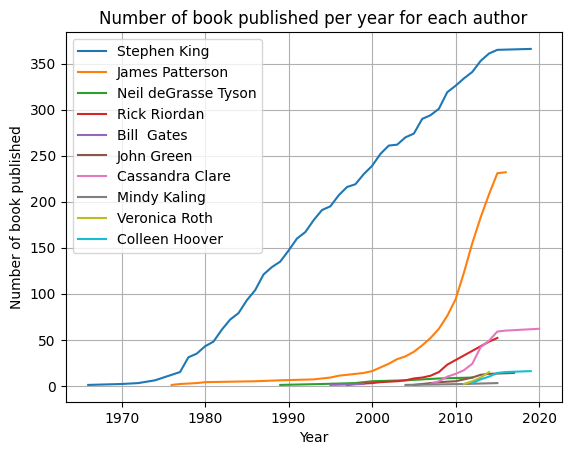

In [23]:
# RQ6.2 For each of the authors, give a convenient plot showing how many books has the given author published UP TO a given year. Are these authors contemporary with each other? Can you notice a range of years where their production rate was higher?

# Input maximum year
year = int(input())

# Clean data through the same processes used for the other exercises
df_top_authors_books = top_authors_books[pd.to_datetime(top_authors_books['original_publication_date'], errors='coerce').notnull()]
df_top_authors_books['original_publication_date'] = pd.to_datetime(df_top_authors_books['original_publication_date'])
df_top_authors_books = df_top_authors_books[df_top_authors_books['original_publication_date'].dt.year <= year]

main_dict = {}

# Creates a dictionary with key value the authors_name
for name in df_top_authors_books['author_name'].unique():
    top10_authors_filtered = df_top_authors_books[df_top_authors_books['author_name'] == name]
    min_publication_dates = top10_authors_filtered.groupby('work_id')['original_publication_date'].min()
    min_publication_dates = min_publication_dates.sort_values(ascending=True)

    author_dict = {}
    work_ids_list = []

    # Appends work_id unique to the item in the inner dictionaries for each year
    for work_id, pub_date in min_publication_dates.items():
        year = pub_date.year
        work_ids_list.append(work_id)
        author_dict[year] = work_ids_list.copy()
    main_dict[name] = author_dict

author_year_counts = {}

# Iterate through the main_dict to calculate the counts of work_ids for each author and year
for author, years in main_dict.items():
    author_counts = {}
    for year, work_ids in years.items():
        author_counts[year] = len(work_ids)
    author_year_counts[author] = author_counts

# Plotting the graph for each author
for author, counts in author_year_counts.items():
    years = list(counts.keys())
    work_id_counts = list(counts.values())
    plt.plot(years, work_id_counts, label=author)

plt.xlabel('Year')
plt.ylabel('Number of book published')
plt.title('Number of book published per year for each author')
plt.legend()
plt.grid(True)
plt.show()

# There are two groups of authors one can be seen started publishing book after 2000 and the other started publishing book before 2000. Both group still work_id books to this date. They can all be considered contemporary authors.
# Group which started publishing before 2000: Suzanne Collins, Cassandra Clare, John Green, Rick Riordan, J.K. Rowling, Dan Brown
# Published before 2000: Stephen King, Neil deGrasse Tyson, Bill Gates, Rick Riordan, James Patterson
# Published after 2000: Veronica Roth, Mindy Kaling, Colleen Hoover, Cassandra Clare

